# TP1 : Classification de voyelles par lois gaussiennes
NOM - PRÉNOM : FOUILHE - Guilhem

Déposer le notebook sur Moodle à la fin de la séance

### Vérification des données


In [82]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [83]:
#1- Charger les données d'apprentissage avec le code suivant :
f = open('APP.pkl', 'rb')
dicoAPP = pickle.load(f)
app_aa = dicoAPP["aa"]
app_ii = dicoAPP["ii"]
app_uu = dicoAPP["uu"]
f.close()

# Vérifier le contenu et la taille des matrices
app_aa.shape
# Il s'agit de matrices 80x2 résultant d'une ACP sur une paramétrisation cepstrale (cf. cours M1 !).

(80, 2)

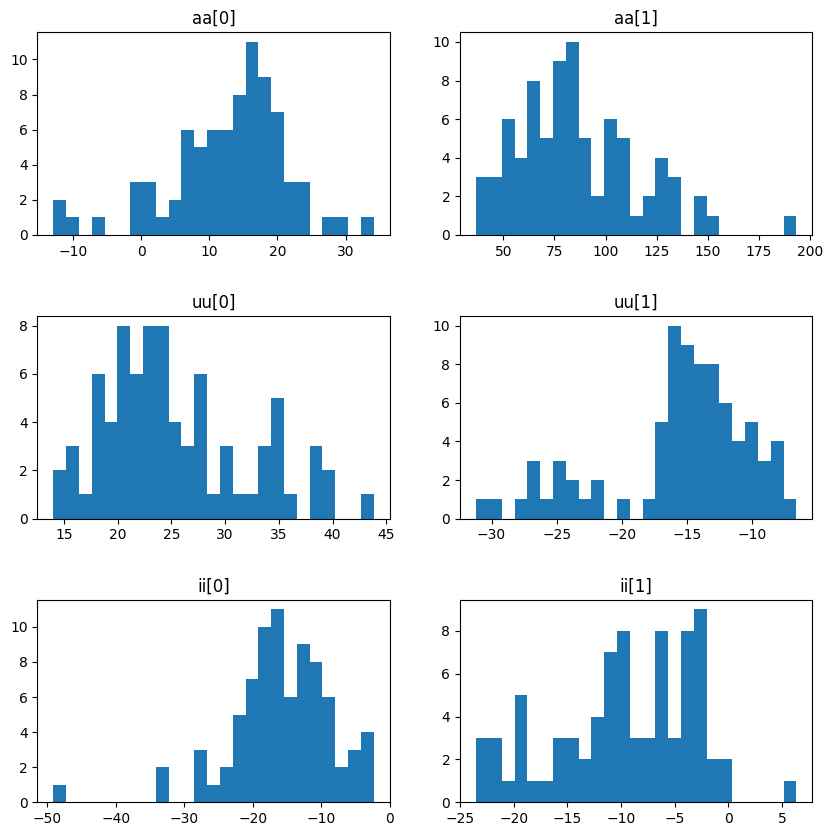

In [84]:
# 2- Afficher sur une seule figure, en utilisant subplot(nb_lignes, nb_colonnes, numero_trace), 
# l'histogramme de chacune des classes : aa, uu et ii.

plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.title('aa[0]')
plt.hist(app_aa[:,0],bins=25)
plt.subplot(3,2,2)
plt.title('aa[1]')
plt.hist(app_aa[:,1],bins=25)
plt.subplot(3,2,3)
plt.title('uu[0]')
plt.hist(app_uu[:,0],bins=25)
plt.subplot(3,2,4)
plt.title('uu[1]')
plt.hist(app_uu[:,1],bins=25)
plt.subplot(3,2,5)
plt.title('ii[0]')
plt.hist(app_ii[:,0],bins=25)
plt.subplot(3,2,6)
plt.title('ii[1]')
plt.hist(app_ii[:,1],bins=25)

plt.subplots_adjust(hspace=0.4)

On voit clairement que l'hypothèse gaussienne sur les données n'est pas parfaite.

### Utilisation de lois gaussiennes

In [85]:
print(np.cov(app_aa).shape)

(80, 80)


In [86]:
#3- APPRENTISSAGE : estimer les paramètres (moyenne et matrice de covariance) de chaque classe
# Quelles sont les dimensions des variables crées ; que contiennent-elles ? 

def MeanAndCov(app):
    mean = np.mean(app,axis=0)
    cov = np.cov(app,rowvar=False)
    return mean, cov

mean_aa, cov_aa = MeanAndCov(app_aa)

mean_uu, cov_uu = MeanAndCov(app_uu)

mean_ii, cov_ii = MeanAndCov(app_ii)

print("Dimensions (moyenne, covariance) : ",mean_aa.shape, " ", cov_aa.shape)

Dimensions (moyenne, covariance) :  (2,)   (2, 2)


In [87]:
#4- RECONNAISSANCE : écrire une fonction "classer" qui renvoie la classe obtenue 
# par maximum de vraisemblance sur les lois gaussiennes estimées (modèle de chaque classe) 
# sur l'observation fournie en entrée :


def classer(obs, m_aa, c_aa, m_uu, c_uu, m_ii, c_ii):
    logL = []
    
    logL.append(np.log(np.linalg.det(c_aa)) + (obs - m_aa).T @ np.linalg.inv(cov_aa) @ (obs - m_aa))
    logL.append(np.log(np.linalg.det(c_uu)) + (obs - m_uu).T @ np.linalg.inv(cov_uu) @ (obs - m_uu))
    logL.append(np.log(np.linalg.det(c_ii)) + (obs - m_ii).T @ np.linalg.inv(cov_ii) @ (obs - m_ii))

    return np.argmin(logL)

def getClassName(pred):
    if pred==0:
        return 'aa'
    if pred==1:
        return 'uu'
    if pred==2:
        return 'ii'

getClassName(classer(app_aa[0,:],mean_aa,cov_aa,mean_uu,cov_uu,mean_ii,cov_ii))

# Exemple de résultat : 
# classe = classer(tst_aa[0,:], m_aa, c_aa, m_uu, c_uu, m_ii, c_ii)
# => no_classe = 1

'aa'

In [88]:
#5- Des observations à tester sont présentes dans le fichier Pickle suivant : TST.pkl
# Charger ces données de tests comme  pour les données d'apprentissage)
# Vérifier leur dimensions et leur contenu
f = open('TST.pkl', 'rb')
dicoTST = pickle.load(f)
tst_aa = dicoTST["aa"]
tst_ii = dicoTST["ii"]
tst_uu = dicoTST["uu"]
f.close()

tst_aa.shape

(20, 2)

In [89]:
#6- Définir la fonction tout_tester qui effectue tous les tests de classification 
def tout_tester(tst_aa,tst_ii,tst_uu,m_aa, c_aa, m_uu, c_uu, m_ii, c_ii):
    pred = []
    label = []

    for i in range(tst_aa.shape[0]):
        obs = tst_aa[i,:]
        pred.append(classer(obs, m_aa, c_aa, m_uu, c_uu, m_ii, c_ii))
        label.append(0)
    
    for i in range(tst_uu.shape[0]):
        obs = tst_uu[i,:]
        pred.append(classer(obs, m_aa, c_aa, m_uu, c_uu, m_ii, c_ii))
        label.append(1)
    
    for i in range(tst_ii.shape[0]):
        obs = tst_ii[i,:]
        pred.append(classer(obs, m_aa, c_aa, m_uu, c_uu, m_ii, c_ii))
        label.append(2)
    
    return pred, label

accuracy =  1.0


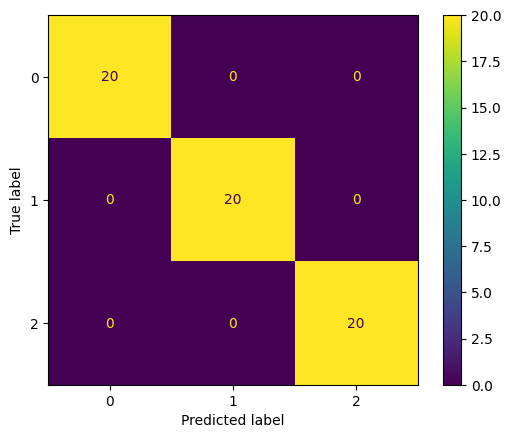

In [90]:
#7- Réaliser les tests et afficher la matrice de confusion et le taux de bonne reconnaisance correspondant 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

pred, label = tout_tester(tst_aa,tst_ii,tst_uu,mean_aa,cov_aa,mean_uu,cov_uu,mean_ii,cov_ii)

print('accuracy = ', accuracy_score(label,pred))

cm = confusion_matrix(label, pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [91]:
# 8- Commenter les résultats obtenus :
# matrice_confusion =
#  20  0  0
#   0 20  0
#   0  0 20
# taux_reco = 1

Notre algorithme obtient une précision parfaite sur chacune des classes, même sur le dataset de test.

### Visualisation  des résultats

Text(0.5, 1.0, 'Test data')

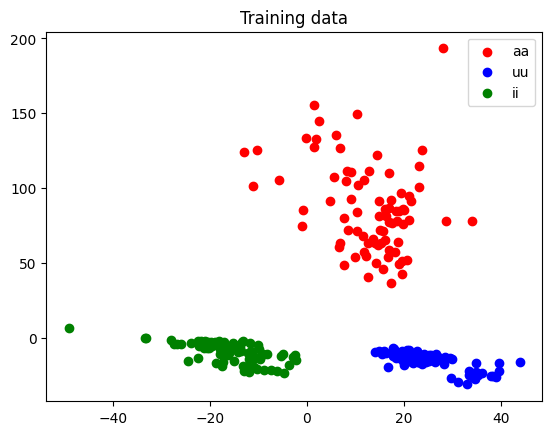

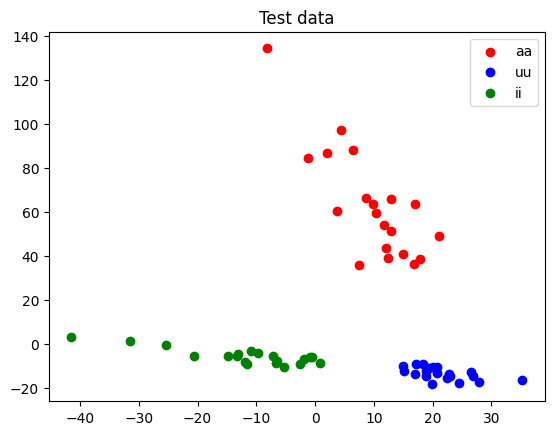

In [92]:
# 9- Représenter en 2D et par des couleurs différentes les nuages de points correspondant 
# aux données d'apprentissage

plt.figure()
plt.scatter(app_aa[:,0],app_aa[:,1],label='aa',c='red')
plt.scatter(app_uu[:,0],app_uu[:,1],label='uu',c='blue')
plt.scatter(app_ii[:,0],app_ii[:,1],label='ii',c='green')
plt.legend()
plt.title("Training data")

plt.figure()
plt.scatter(tst_aa[:,0],tst_aa[:,1],label='aa',c='red')
plt.scatter(tst_uu[:,0],tst_uu[:,1],label='uu',c='blue')
plt.scatter(tst_ii[:,0],tst_ii[:,1],label='ii',c='green')
plt.legend()
plt.title("Test data")


Text(0.5, 1.0, "Centroïdes sur les données d'apprentissage")

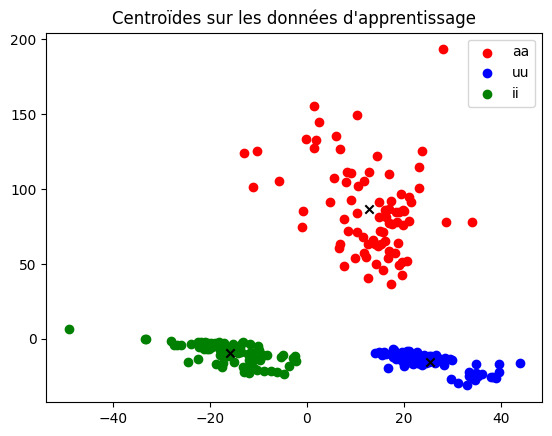

In [100]:
# 10- Afficher les centroïdes des différentes classes
plt.figure()
plt.scatter(app_aa[:,0],app_aa[:,1],label='aa',c='red')
plt.scatter(app_uu[:,0],app_uu[:,1],label='uu',c='blue')
plt.scatter(app_ii[:,0],app_ii[:,1],label='ii',c='green')
plt.scatter(mean_aa[0],mean_aa[1],c='black',marker='x')
plt.scatter(mean_uu[0],mean_uu[1],c='black',marker='x')
plt.scatter(mean_ii[0],mean_ii[1],c='black',marker='x')
plt.legend()
plt.title('Centroïdes sur les données d\'apprentissage')

In [111]:
#11- Réaliser une animation pour l'affichage des points de test (un par un avec des couleurs par exemple...)
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

%matplotlib notebook

fig, ax = plt.subplots()
line, = ax.plot([])     # A tuple unpacking to unpack the only plot
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 200)

def animate(frame_num,data):
    x = data[frame_num,0]
    y = data[frame_num,1]
    line.set_data((x, y))
    return line

anim = FuncAnimation(fig, animate, frames=20, interval=1)
plt.show()

<IPython.core.display.Javascript object>

c:\Users\guilh\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
